In [1]:
from sklearn.datasets import load_boston

In [2]:
boston=load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
data=pd.DataFrame(boston.data)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
data.columns=boston.feature_names

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
target=pd.DataFrame(boston.target)
target.columns=['MEDV']

In [11]:
len(target.loc[target.MEDV==50.0,])

16

In [12]:
data['MEDV']=target['MEDV']

In [13]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


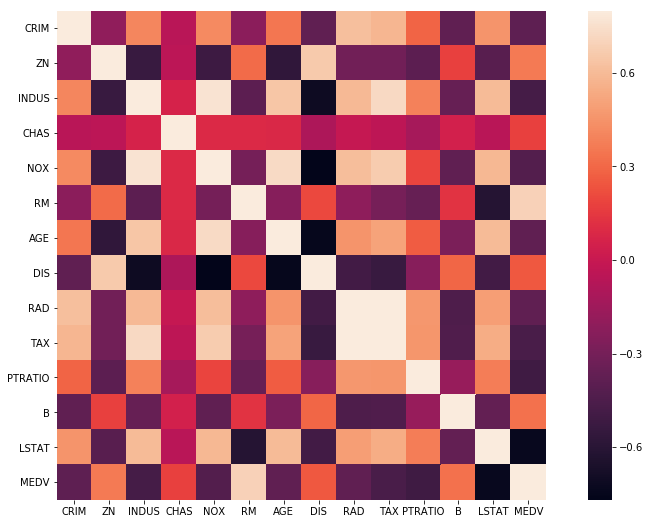

In [14]:
ax=plt.subplots(figsize=(15,9))
import seaborn as sns
correl=data.corr()
sns.heatmap(correl,vmax=0.8,square=True)

In [15]:
from sklearn.cross_validation import ShuffleSplit

C:\Users\naveen chauhan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
price=target.MEDV

In [17]:
features=data.loc[:,['RM','PTRATIO','LSTAT']]

In [18]:
features.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [19]:
minimum_price=np.min(price)

In [20]:
maximum_price=np.max(price)

In [21]:
mean_price=np.mean(price)

In [22]:
median_price=np.median(price)

In [23]:
std_price=np.std(price)

In [24]:
first_quartile=np.percentile(price,25)
third_quartile=np.percentile(price,75)
inter_quartile=third_quartile-first_quartile

In [25]:
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))
print ("First quartile of prices: ${:,.2f}".format(first_quartile))
print ("Second quartile of prices: ${:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19
First quartile of prices: $17.02
Second quartile of prices: $25.00
Interquartile (IQR) of prices: $7.98


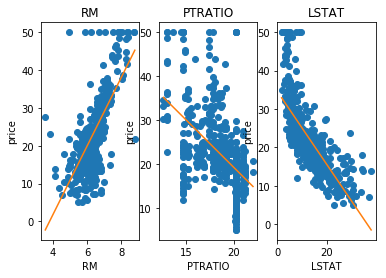

In [26]:
for i,col in enumerate(features.columns):
    plt.subplot(1,3,i+1)
    x=data[col]
    y=price
    plt.plot(x,y,'o')
    plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('price')

In [44]:
from sklearn.metrics import r2_score
def performance_metric(y_true,y_pred):
    accuracy_score=r2_score(y_pred,y_true)
    print("the accuracy of classification  ",accuracy_score)
    return accuracy_score 

In [28]:
#now split the dataset
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(features,price,random_state=42)

In [29]:
train_X.shape

(379, 3)

In [48]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X,y):
    cv_sets=ShuffleSplit(X.shape[0],n_iter=10,test_size=.20,random_state=0)
    regressor=DecisionTreeRegressor()
    count=range(1,11)
    params=dict(max_depth=count)
    #now grid Search cv
    scoring_func=make_scorer(performance_metric)
    grid=GridSearchCV(regressor,params,cv=cv_sets,scoring=scoring_func)
    grid=grid.fit(X,y)
    return grid.best_estimator_

In [55]:
from sklearn.model_selection import RandomizedSearchCV
def fit_model2(X,y):
    cv_sets=ShuffleSplit(X.shape[0],n_iter=10,test_size=.20,random_state=0)
    regressor=DecisionTreeRegressor()
    count=range(1,11)
    params=dict(max_depth=count)
    scoring_func=make_scorer(performance_metric)
    grid=RandomizedSearchCV(regressor,params,cv=cv_sets,scoring=scoring_func)
    grid=grid.fit(X,y)
    return grid.best_estimator_

In [56]:
reg=fit_model(train_X,train_y)
reg.get_params()['max_depth']

the accuracy of classification   -0.115779422858
the accuracy of classification   -0.185733043968
the accuracy of classification   0.156439230606
the accuracy of classification   -0.138898459171
the accuracy of classification   -0.583494534645
the accuracy of classification   -0.0990189812412
the accuracy of classification   -1.17611834322
the accuracy of classification   0.210686681002
the accuracy of classification   -0.268052751394
the accuracy of classification   0.0743292687445
the accuracy of classification   -0.317042810483
the accuracy of classification   -0.2161465017
the accuracy of classification   -0.602672040829
the accuracy of classification   -0.0388592704353
the accuracy of classification   -0.139663329391
the accuracy of classification   -0.104029145543
the accuracy of classification   -0.794646465115
the accuracy of classification   -0.0222016039089
the accuracy of classification   -0.459652778868
the accuracy of classification   -0.102093538129
the accuracy of classi

5

In [57]:
reg_2=fit_model2(train_X,train_y)
reg_2.get_params()

the accuracy of classification   -0.115779422858
the accuracy of classification   -0.185733043968
the accuracy of classification   0.156439230606
the accuracy of classification   -0.138898459171
the accuracy of classification   -0.583494534645
the accuracy of classification   -0.0990189812412
the accuracy of classification   -1.17611834322
the accuracy of classification   0.210686681002
the accuracy of classification   -0.268052751394
the accuracy of classification   0.0743292687445
the accuracy of classification   -0.317042810483
the accuracy of classification   -0.2161465017
the accuracy of classification   -0.602672040829
the accuracy of classification   -0.0388592704353
the accuracy of classification   -0.139663329391
the accuracy of classification   -0.104029145543
the accuracy of classification   -0.794646465115
the accuracy of classification   -0.0222016039089
the accuracy of classification   -0.459652778868
the accuracy of classification   -0.102093538129
the accuracy of classi

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [58]:
client_data=[[5,17,15],
             [4,32,22],
             [8,3,12]]

In [59]:
print(reg.predict(client_data))

[ 20.53125     11.89310345  48.23846154]


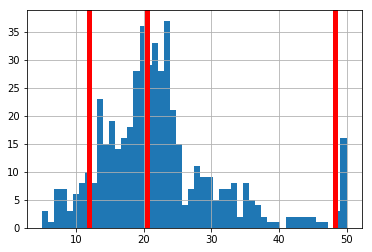

In [62]:
price.hist(bins=50)
for prices in reg.predict(client_data):
    plt.axvline(prices,lw=5,c='r')